**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

---

# 1. K-Means

**수행과정**

1. K-Means는 군집 중심점(centroid)라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택한다.


2. 군집 중심점은 선택된 포인트의 평균 지점으로 이동하고 이동된 중심점에서 다시 가까운 포인트를 선택한다.


3. 이 과정을 반복하다가 더이상 중심점의 이동이 없으면 반복을 멈추고 해당 중심점에 속하는 포인트들을 군집화 한다.

**장점**

- 알고리즘이 쉽고 간결하다.


- 비지도학습으로 사전 라벨 데이터가 필요없다.

**단점**

- 거리 기반의 알고리즘이므로 속성(피처)의 개수가 많으면 군집화 정확도가 떨어진다.

    
- 반복 횟수가 많아지면 수행 시간이 매우 느려진다.


- 몇 개의 군집 즉, K 설정에 대한 가이드가 어렵다.

## 1.1 IRIS 데이터

In [3]:
from sklearn.datasets import load_iris

# target 변수를 제외한 데이터 프레임
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])

iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

- `sklearn.cluster`의 `KMeans()`로 K-Means를 수행할 수 있다.


- n_clusters는 군집화할 갯수로서 군집 중심점의 개수를 의미한다.


- init은 초기에 군집 중심점 좌표 설정 방식으로 보통은 k-means++로 설정한다.


- max_iter는 최대 반복 횟수로 그 전에 모든 데이터 중심점 이동이 없으면 종료한다.

In [5]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

- `labels_` 속성은 각 데이터 포인트가 속한 군집 중심점 레이블이다.


- 이 외에도 `cluster_centers_` 속성은 각 군집 중심점 좌표를 가지고 있다.

In [6]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

iris_result = iris_df.groupby(['target','cluster']).size()
iris_result

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
dtype: int64

- target이 0인 데이터는 모두 1번 군집으로 잘 분류되었다.


- target이 1인 데이터는 2개만 0번 군집으로, 나머지는 2번 군집으로 분류되었다.


- target이 2인 데이터는 36개가 0번 군집으로, 14개가 2번 군집으로 분류되었다.

In [7]:
from sklearn.decomposition import PCA

# PCA 차원축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df["pca_x"] = pca_transformed[:,0]
iris_df["pca_y"] = pca_transformed[:,1]

iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


- PCA를 이용해 2개의 컴포넌트를 생성 후 데이터에 추가하였다.


- 이를 이용해서 군집화를 시각화 해보자.

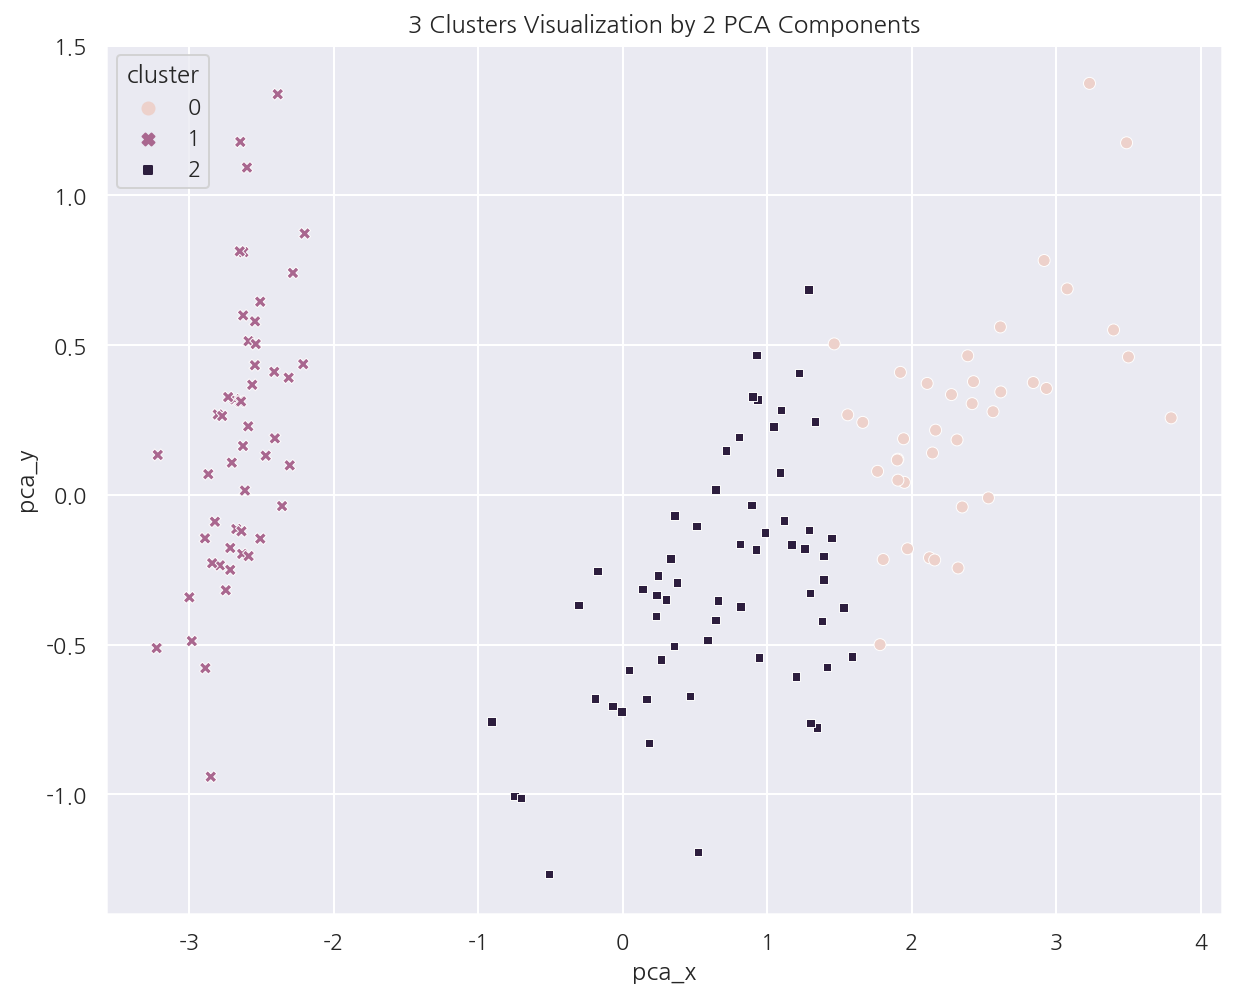

In [8]:
sns.scatterplot(x="pca_x", y="pca_y", data=iris_df, 
                hue= "cluster", style = "cluster")

plt.title("3 Clusters Visualization by 2 PCA Components")
plt.show()

- Cluster 1은 명확하게 잘 분리되어 있다.


- Cluster 0,2는 대부분 잘 분리되어있지만 일부가 완전히 분리되진 않았다.

## 1.2 군집화 가상데이터

사이킷런 패키지에는 군집화용 데이터 생성이 가능한 다양한 API가 있다.

- `make_blobs()`: 대표적인 군집화 데이터 생성기로 개별 군집의 중심점과 표준 편차 제어기능이 있다.


- `make_classfication()`: 역시 대표적인 군집화 데이터 생성기로 노이즈를 추가할 수 있다.


- 이외에도 `make_circle()`, `make_moond()`은 중심 기반 군집화로 해결하기 어려운 데이터를 생성한다.

In [9]:
from sklearn.datasets import make_blobs

# make_blobs
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# target 값 분포
unique, counts = np.unique(y, return_counts=True)
print(f"군집종류: {unique}, 각 군집별 갯수: {counts}")

(200, 2) (200,)
군집종류: [0 1 2], 각 군집별 갯수: [67 67 66]


- `make_blobs()`를 이용해 가상데이터를 생성하였다.


- centers는 군집의 갯수로서 만약 ndarray 형태로 입력하면 개별 군집 중심점의 좌표로 인식한다.


- cluster_std는 생성될 군집 데이터의 표준편차를 의미하며 각 군집별로 설정 가능하다.

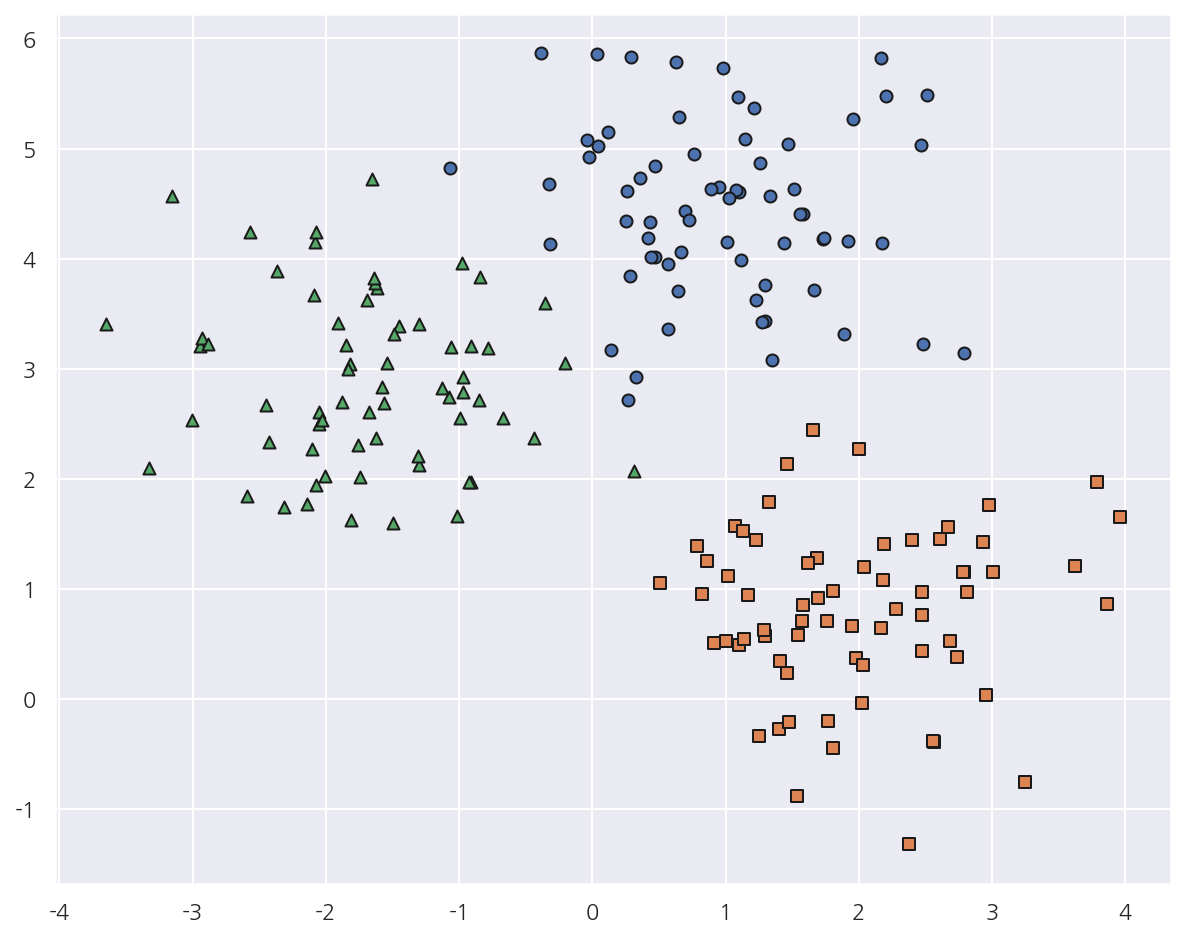

In [10]:
# 데이터 프레임 생성
cluster_df = pd.DataFrame(X, columns=["ftr1","ftr2"])
cluster_df["target"] = y

# target 값 종류
target_list = np.unique(y)

# 가상 데이터 시각화
markers=['o', 's', '^']

for target in target_list:
    target_cluster = cluster_df[cluster_df['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], 
                edgecolor='k', marker=markers[target] )
    
plt.show()

- 가상 데이터를 데이터 프레임으로 만들고 시각화 해보았다.


- 이 데이터를 이용해서 K-Means를 수행해보자.

In [11]:
# K-Means 객체 생성
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=200, random_state=0)

# cluster label (fit, fit_predict의 결과가 같았다.)
cluster_labels = kmeans.fit_predict(cluster_df.iloc[:,:-1])
cluster_df["kmeans_label"] = cluster_labels

# 개별 클러스터의 중심 위치 좌표
centers = kmeans.cluster_centers_

- K-Means를 수행하고 데이터 프레임에 cluster label을 추가하였다.


- `cluster_centers_` 속성의 각 군집 중심점 좌표를 시각화를 위해 추출하였다.

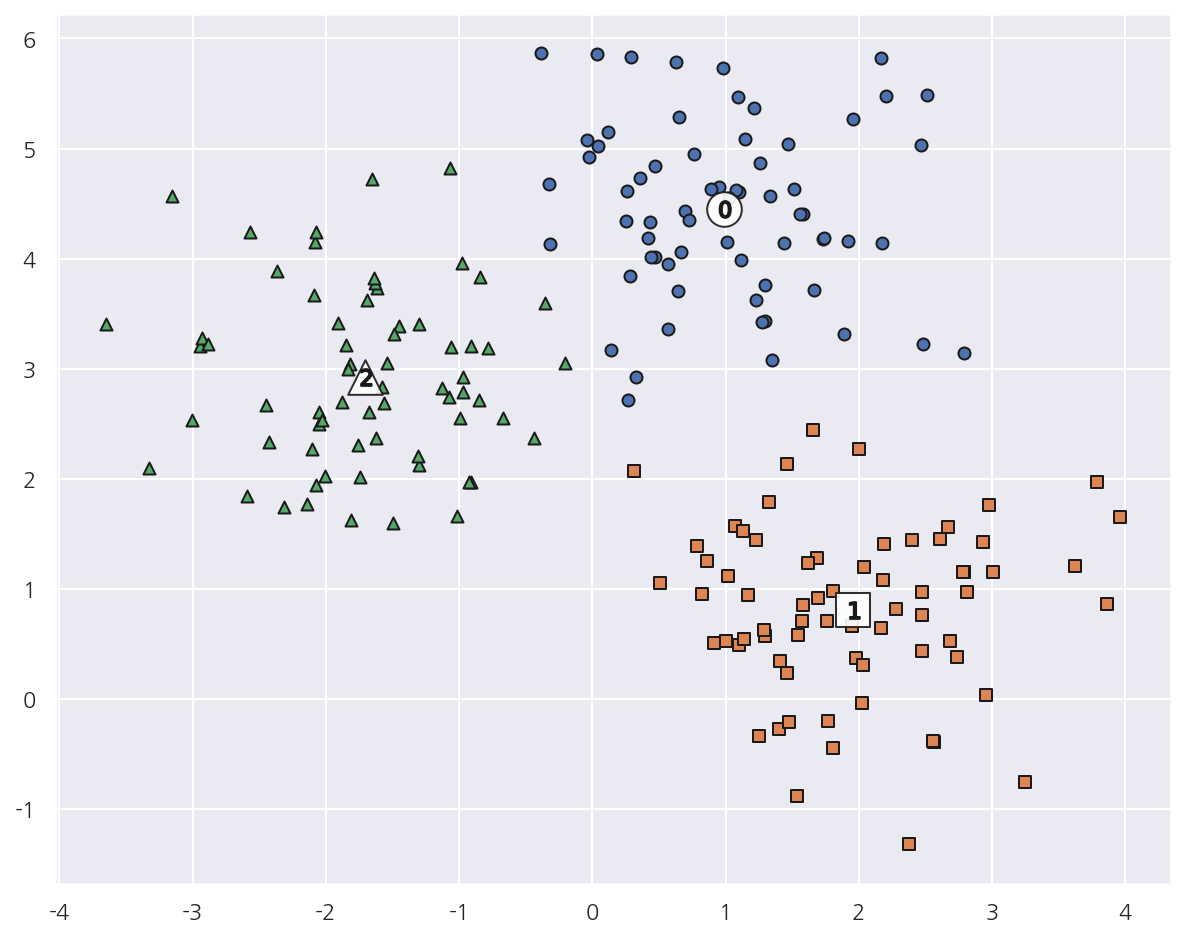

In [12]:
# cluster 값 종류
unique_labels = np.unique(cluster_labels)

markers=['o', 's', '^', 'P','D','H','x']

for cluster in unique_labels:
    
    # 각 군집 시각화
    cluster_v = cluster_df[cluster_df['kmeans_label'] == cluster]    
    plt.scatter(x=cluster_v['ftr1'], y=cluster_v['ftr2'], edgecolor='k', marker=markers[cluster] )
    
    # 군집별 중심 위치 시각화
    center_xy = centers[cluster]
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=300, color='white',
                alpha=0.9, edgecolor='k', marker = markers[cluster])
    
    plt.scatter(x = center_xy[0], y = center_xy[1], s=70, color='k', 
                edgecolor='k', marker = f"${cluster}$")
    
    
plt.show()

- 각 군집과 군집별 중심 위치를 시각화 하였다.


- 앞서 가상데이터를 시각화했을 때와 비교하면 제법 잘 매핑된 것으로 보인다.

In [13]:
cluster_df.groupby(['target','kmeans_label']).size()

target  kmeans_label
0       0               66
        2                1
1       1               67
2       1                1
        2               65
dtype: int64

- 실제로 target 0,2에서 각각 1건씩만 다르게 분류되고 나머지는 잘 매핑되었다.